# 🧱🏭 **Training and Building of PVRE-MNIST Dataset**

**Source:** [Inducing Causal Structure for Interpretable Neural Networks]("https://arxiv.org/pdf/2112.00826.pdf")

## 📝 Notes:

* Input is a grid of $4$ images of mnist. 
* The $4$ input images are defined as $(I_{TL}, I_{TR}, I_{BL}, T_{BR})$

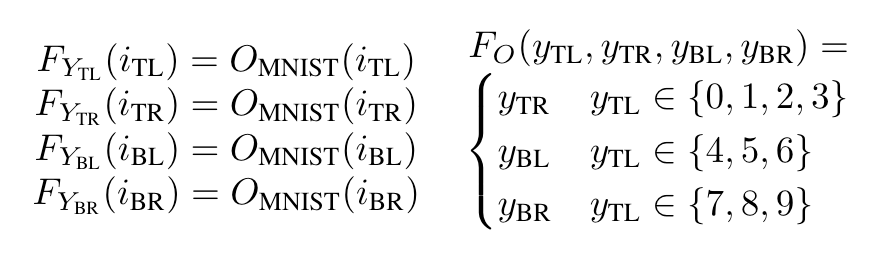

* It creates a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



## 📊👨🏻‍💻 **Splitting the train-test split based on the condition**

* PVR-MNIST is created such that a test split designed in a way by removing examples from train examples, which meets the following conditions:
    * Top right image $(i_{TR}) \in \{1,2,3\}$, $(i_{BL}) \in \{4,5,6\}$ or $(i_{BR}) \in \{0,7,8,9\}$  



In [5]:
from definitions import *

folder_path = 'pvr_mnist_dataset/images/'

In [6]:
images = [[np.array(Image.open(os.path.join(folder_path,i)).convert('RGB')), re.findall(r'\d+',i)] for i in tqdm(os.listdir(folder_path))]

p(len(images))

100%|██████████| 1000000/1000000 [03:18<00:00, 5027.40it/s]

1000000



The format of the image is like:

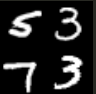

Meanwhile the label is in the format: array([5, 7, 3, 3]), i.e. $(i_{TL},i_{BL},i_{TR},i_{BR})$

In [13]:
train_image, test_image, train_label, test_label = [], [], [], []


def filter(images, labels):
    for image in tqdm(images):
        label = labels[int(*image[1])]
        if label[2] in {1,2,3} or label[1] in {4,5,6} or label[-1] in {0,7,8,9}:
            train_image.append(image[0])
            train_label.append(label)
        else:
            test_image.append(image[0])
            test_label.append(label)

    return train_image, test_image, train_label, test_label

In [14]:
train_image, test_image, train_label, test_label = filter(images, labels)

100%|██████████| 1000000/1000000 [00:00<00:00, 1577647.62it/s]


705884

294116



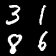

In [24]:
p(len(train_image));p(len(test_image))
transforms.ToPILImage()(train_image[1])

## 🚅🏋🏻‍♂️ **Training the ResNet on PVR-MNIST Dataset**